In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%%bash

cat << EOF > in
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 2000
nconfig 10 trajectory.xyz
nstat   10 energies.dat
pressure 1
EOF

../cpp/simplemd.x < in

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 864
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 1.000000
Pressure                         : 1.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 2000
Stride for trajectory            : 10
Trajectory file                  : trajectory.xyz
Stride for statistics            : 10
Statistics file                  : energies.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 37152
Neighbour list recomputed at step 9
List size: 37597
Neighbour list recomputed at step 25
List size: 41443
Neighbour list recomputed at step 36
List size: 44316
Neighbour list recomputed at step 51
List size: 45787
Neighbour list recomputed at step 67
List si

In [24]:
data=np.loadtxt("energies.dat")

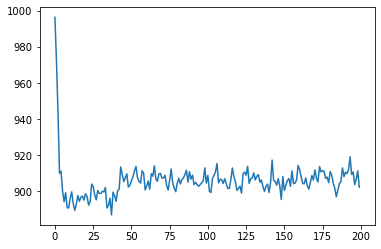

In [25]:
plt.plot(data[:,-1])

In [36]:
%%bash

#for pressure in 1 10 100 1000
for pressure in 10000 100000
do
cat << EOF > in-$pressure
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 2000
nconfig 10 trajectory-$pressure.xyz
nstat   10 energies-$pressure.dat
pressure $pressure
EOF

../cpp/simplemd.x < in-$pressure &

done

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 864
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 1.000000
Pressure                         : 10000.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 2000
Stride for trajectory            : 10
Trajectory file                  : trajectory-10000.xyz
Stride for statistics            : 10
Statistics file                  : energies-10000.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 37152
Neighbour list recomputed at step 9
List size: 37597
Neighbour list recomputed at step 24
List size: 40949
Neighbour list recomputed at step 35
List size: 43721
Neighbour list recomputed at step 44
List size: 46893
Neighbour list recomputed at

In [37]:
data=[]
data.append(np.loadtxt("energies-1.dat"))
data.append(np.loadtxt("energies-10.dat"))
data.append(np.loadtxt("energies-100.dat"))
data.append(np.loadtxt("energies-1000.dat"))
data.append(np.loadtxt("energies-10000.dat"))
data.append(np.loadtxt("energies-100000.dat"))

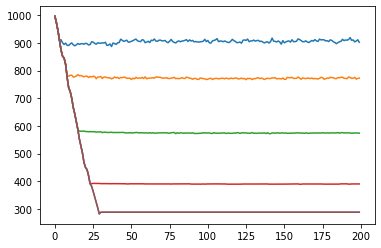

In [39]:
plt.plot(data[0][:,-1])
plt.plot(data[1][:,-1])
plt.plot(data[2][:,-1])
plt.plot(data[3][:,-1])
plt.plot(data[4][:,-1])
plt.plot(data[5][:,-1])

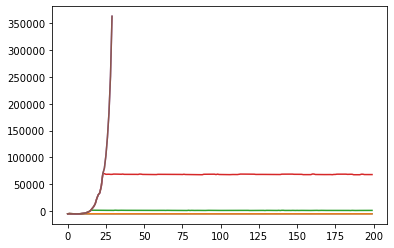

In [40]:
plt.plot(data[0][:,3])
plt.plot(data[1][:,3])
plt.plot(data[2][:,3])
plt.plot(data[3][:,3])
plt.plot(data[4][:,3])
plt.plot(data[5][:,3])

In [42]:
%%bash
# here I use the version with eng correction
for pressure in 1 10 100 1000
#for pressure in 10000 100000
do
cat << EOF > in-$pressure
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff 2.5
listcutoff  3.0
nstep 2000
nconfig 10 trajectory-lr-$pressure.xyz
nstat   10 energies-lr-$pressure.dat
pressure $pressure
lr true
EOF

../cpp/simplemd.x < in-$pressure &

done

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 864
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 1.000000
Pressure                         : 1.000000
Cutoff for forces                : 2.500000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 2000
Stride for trajectory            : 10
Trajectory file                  : trajectory-lr-1.xyz
Stride for statistics            : 10
Statistics file                  : energies-lr-1.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 37152
Neighbour list recomputed at step 9
List size: 37597
Neighbour list recomputed at step 25
List size: 41443
Neighbour list recomputed at step 36
List size: 44316
Neighbour list recomputed at step 49
List size: 46248
Neighbour list recomputed at step 

In [47]:
datalr=[]
datalr.append(np.loadtxt("energies-lr-1.dat"))
datalr.append(np.loadtxt("energies-lr-10.dat"))
datalr.append(np.loadtxt("energies-lr-100.dat"))
datalr.append(np.loadtxt("energies-lr-1000.dat"))

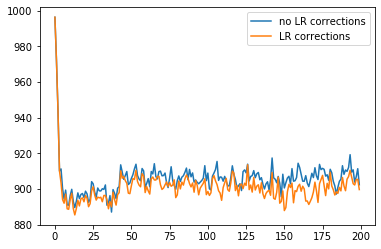

In [50]:
plt.plot(data[0][:,-1],label="no LR corrections")
plt.plot(datalr[0][:,-1],label="LR corrections")
plt.legend()


In [79]:
%%bash
# here I use the version with eng correction
for rc in 1.5 2.0 2.5 3.0
do
cat << EOF > in-$rc
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff $rc
listcutoff  $(awk -v rc=$rc '{print(rc+0.5)}')
nstep 20000
nconfig 10 trajectory-$rc.xyz
nstat   10 energies-$rc.dat
pressure 1.0
lr false
EOF

../cpp/simplemd.x < in-$rc &

cat << EOF > in-lr-$rc
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff $rc
listcutoff  $(awk -v rc=$rc '{print(rc+0.5)}')
nstep 20000
nconfig 10 trajectory-lr-$rc.xyz
nstat   10 energies-lr-$rc.dat
pressure 1.0
lr true
EOF

../cpp/simplemd.x < in-lr-$rc &

done

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 864
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 1.000000
Pressure                         : 1.000000
Cutoff for forces                : 3.000000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 20000
Stride for trajectory            : 10
Trajectory file                  : trajectory-3.0.xyz
Stride for statistics            : 10
Statistics file                  : energies-3.0.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 37152
Neighbour list recomputed at step 0
List size: 37152
Neighbour list recomputed at step 1
List size: 37152
Neighbour list recomputed at step 2
List size: 37152
Neighbour list recomputed at step 3
List size: 37152
Neighbour list recomputed at step 4
Li

In [69]:
%%bash
# here I use the version with eng correction
for rc in 1.5 2.0 2.5 3.0
do
cat << EOF > in-lr-$rc
inputfile crystal.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1.0
forcecutoff $rc
listcutoff  $(awk -v rc=$rc '{print(rc+0.5)}')
nstep 20000
nconfig 10 trajectory-lr-$rc.xyz
nstat   10 energies-lr-$rc.dat
pressure 1.0
lr true
EOF

../cpp/simplemd.x < in-lr-$rc &

done

Starting configuration           : crystal.xyz
Final configuration              : output.xyz
Number of atoms                  : 864
Temperature                      : 0.722000
Time step                        : 0.005000
Friction                         : 1.000000
Pressure                         : 1.000000
Cutoff for forces                : 3.000000
Cutoff for neighbour list        : 3.000000
Number of steps                  : 20000
Stride for trajectory            : 10
Trajectory file                  : trajectory-lr-3.0.xyz
Stride for statistics            : 10
Statistics file                  : energies-lr-3.0.dat
Max average number of neighbours : 1000
Seed                             : 0
Are atoms wrapped on output?     : F
List size: 37152
Neighbour list recomputed at step 0
List size: 37152
Neighbour list recomputed at step 1
List size: 37152
Neighbour list recomputed at step 2
List size: 37152
Neighbour list recomputed at step 3
List size: 37152
Neighbour list recomputed at ste

In [80]:
data=[]
data.append(np.loadtxt("energies-1.5.dat"))
data.append(np.loadtxt("energies-2.0.dat"))
data.append(np.loadtxt("energies-2.5.dat"))
data.append(np.loadtxt("energies-3.0.dat"))
datalr=[]
datalr.append(np.loadtxt("energies-lr-1.5.dat"))
datalr.append(np.loadtxt("energies-lr-2.0.dat"))
datalr.append(np.loadtxt("energies-lr-2.5.dat"))
datalr.append(np.loadtxt("energies-lr-3.0.dat"))

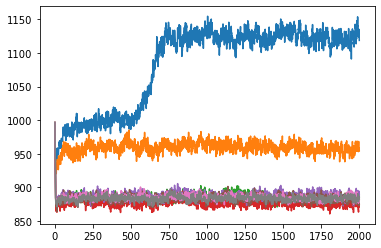

In [81]:
plt.plot(data[0][:,-1])
plt.plot(datalr[0][:,-1])
plt.plot(data[1][:,-1])
plt.plot(datalr[1][:,-1])
plt.plot(data[2][:,-1])
plt.plot(datalr[2][:,-1])
plt.plot(data[3][:,-1])
plt.plot(datalr[3][:,-1])

In [83]:
rc=(1.5,2.0,2.5,3.0)
v=[]
vlr=[]
for i in range(4):
    v.append(np.average(data[i][len(data[i])//4:,-1]))
    vlr.append(np.average(datalr[i][len(data[i])//4:,-1]))

(2, 3.075)

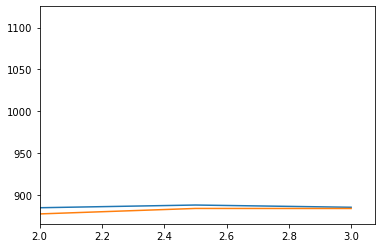

In [86]:
plt.plot(rc,v)
plt.plot(rc,vlr)
plt.xlim((2,None))

In [87]:
v

[1113.542957483333, 884.6877525606668, 887.9235204206668, 885.229976908]

In [88]:
vlr

[959.7852281066666, 877.3026333033334, 883.8383027793334, 883.7915300799999]

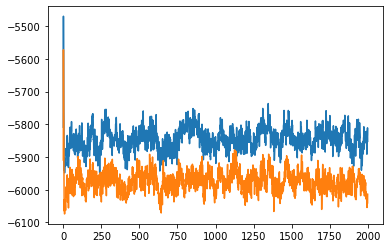

In [90]:
plt.plot(data[2][:,3])
plt.plot(datalr[2][:,3])
